In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns_name=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=columns_name)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df["num"]=df["num"].apply(lambda x: 0 if x==0 else 1)

In [6]:
df["num"].unique()

array([0, 1], dtype=int64)

In [7]:
df=df[df["ca"]!='?']

In [8]:
df=df[df["thal"]!='?']

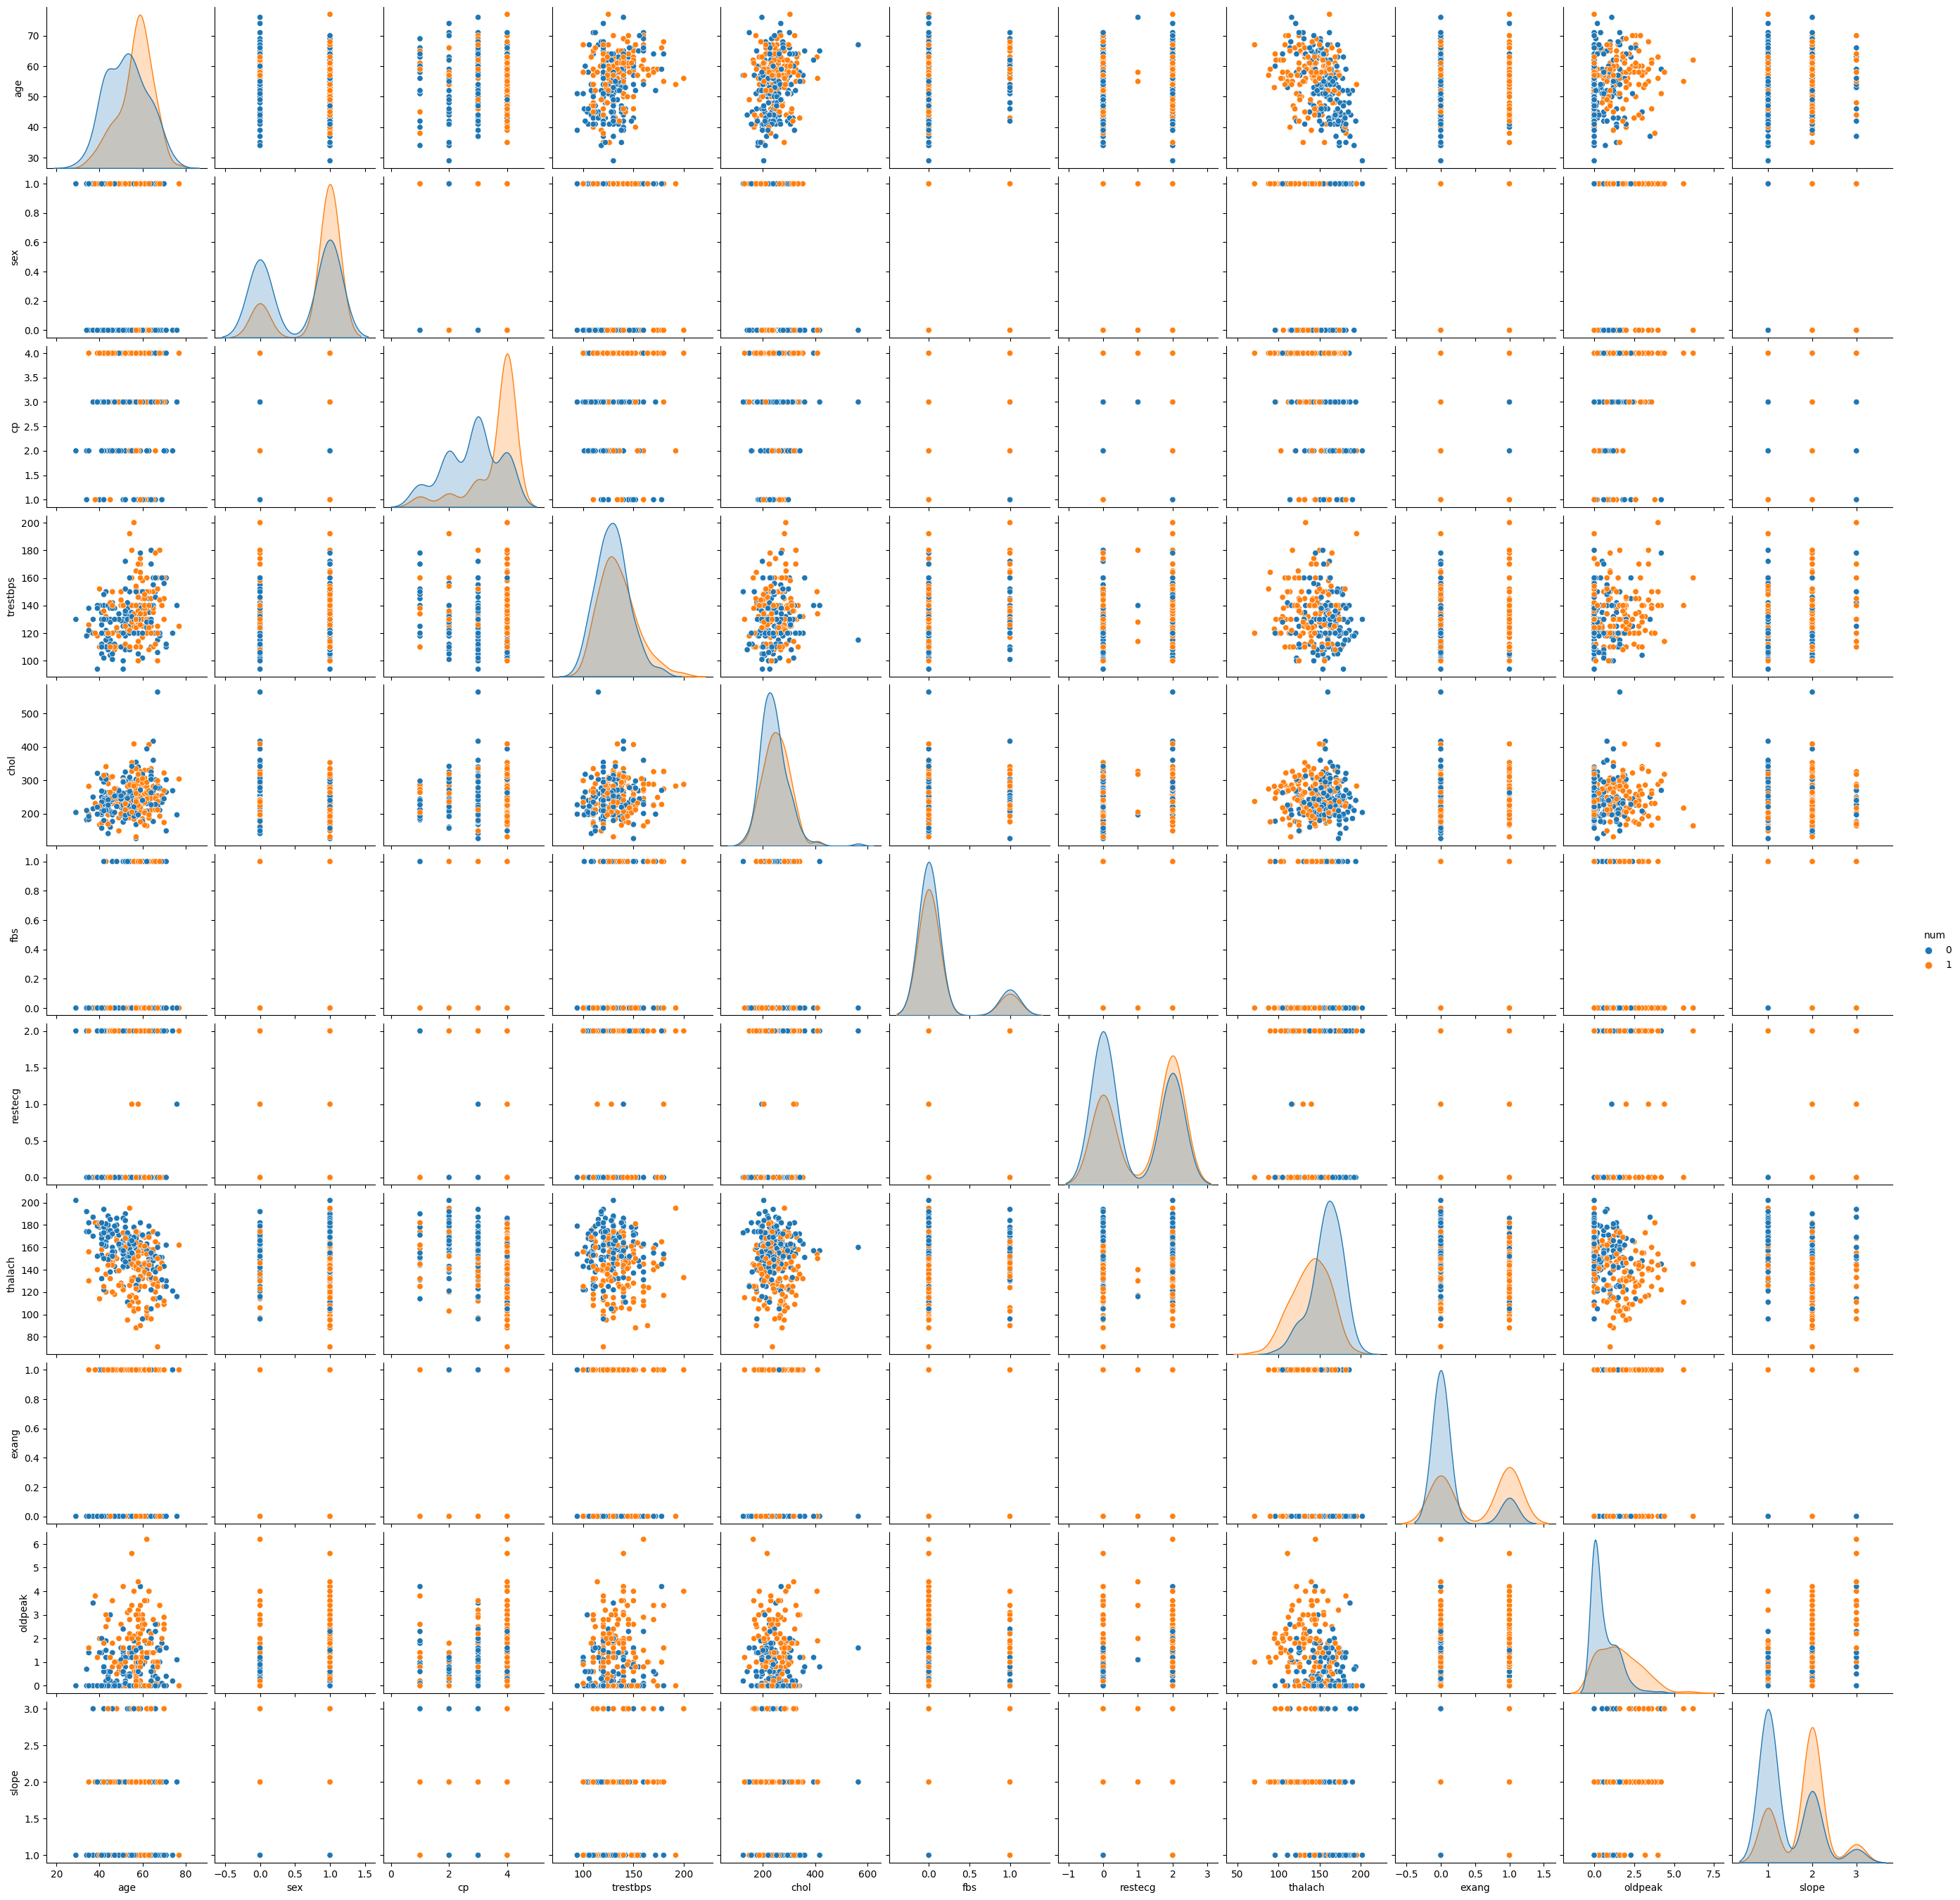

In [9]:
sns.pairplot(data=df, hue='num')

با مدلسازی هایی که انجام شد مدل جنگل تصادفی هیچ خطایی در تشخیص داده ترین نشان نمیدهد و قابل اطمینان ترین مدل است

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [10]:
X =df.iloc[:, :-1].values
y =df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
df = pd.get_dummies(df, columns=['cp','restecg','slope','ca','thal'], drop_first=False)

In [13]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,1,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1,1,...,0,1,0,1,0,0,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,1,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1,0,...,0,1,0,0,1,0,0,0,0,1


In [14]:
sclra = StandardScaler()
X_norm = sclra.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=43, random_state=42)
sclr = StandardScaler()
x_train_norm = sclr.fit_transform(x_train)
x_test_norm = sclr.transform(x_test)
x_train.shape, x_test.shape

((254, 13), (43, 13))

In [15]:
def runall(model):
    model.fit(X_norm, y)
    y_pred = model.predict(X_norm)
    print(
        classification_report(y, y_pred, zero_division=0)
    )
    
def runsplit(model):
    model.fit(x_train_norm, y_train)
    y_pred = model.predict(x_test_norm)
    print(
        classification_report(y_test, y_pred, zero_division=0)
    )
def plotpr(model):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 7))
    name=str(model).split('(',1)[0]
    y_pred = model.predict_proba(x_test_norm)[:, 1]
    PrecisionRecallDisplay.from_predictions(
        y_test, y_pred, ax=ax1, name=f'PrecisionRecall for {name}')
    RocCurveDisplay.from_predictions(
        y_test, y_pred, ax=ax2,  name=f'RocCurve for {name}')
    plt.show()
    
def run(model):
    print('Split mode:')
    runsplit(model)
    plotpr(model)
    print('All mode:')
    runall(model)
    plotpr(model)

Split mode:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.84      0.80      0.82        20

    accuracy                           0.84        43
   macro avg       0.84      0.83      0.84        43
weighted avg       0.84      0.84      0.84        43



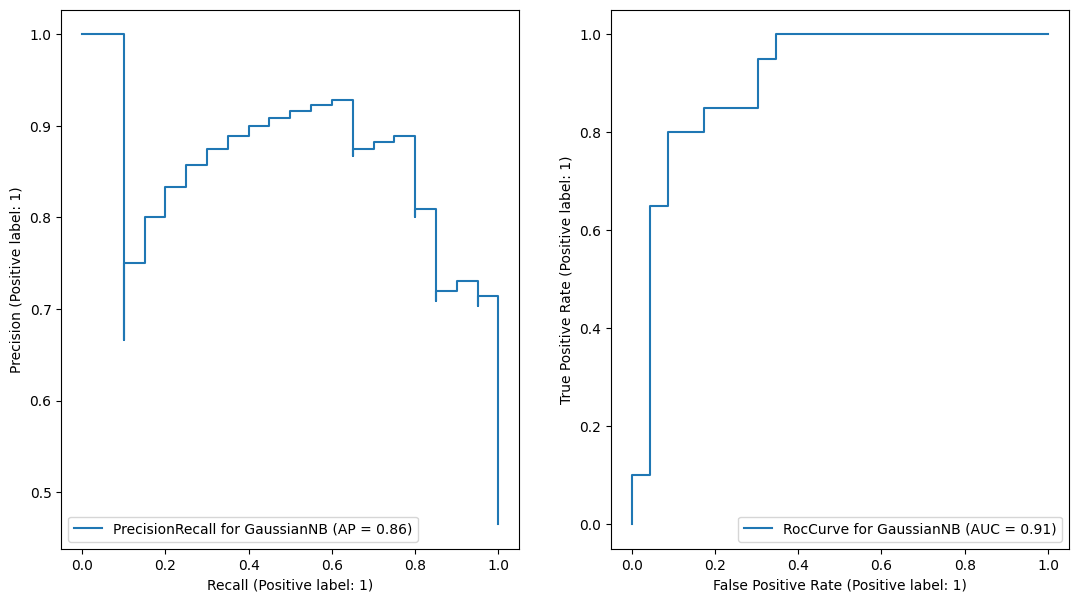

All mode:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       160
           1       0.86      0.80      0.83       137

    accuracy                           0.85       297
   macro avg       0.85      0.85      0.85       297
weighted avg       0.85      0.85      0.85       297



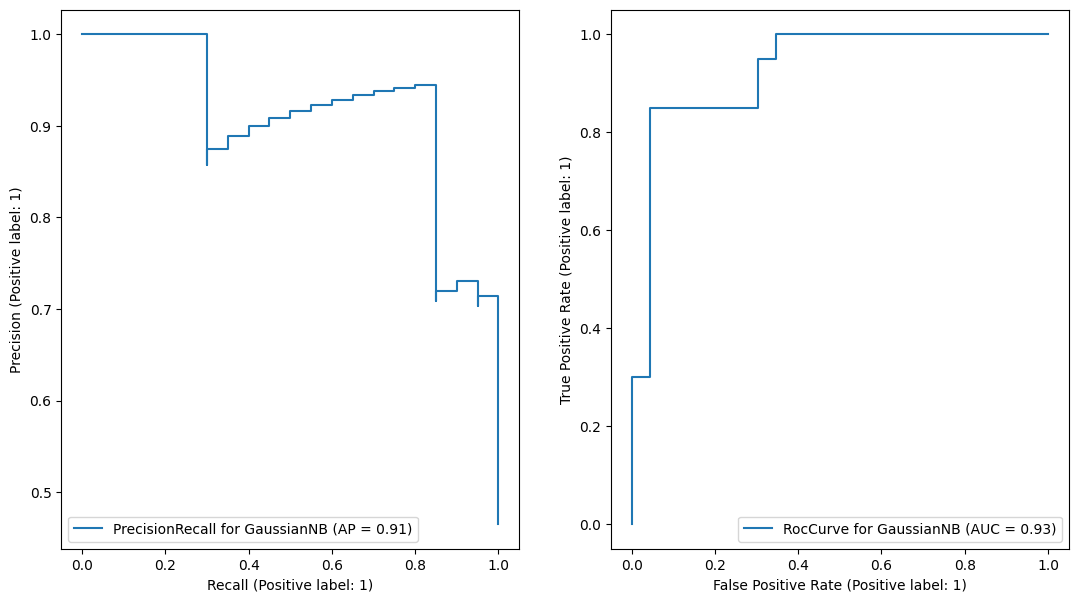

In [16]:
nb = GaussianNB()
run(nb)

In [32]:
nb_res = pd.DataFrame([nb.predict_proba(X_norm)[:,1], nb.predict(X_norm), y], index=['Prob','predict', 'Label']).T
nb_res[nb_res['predict'] != nb_res['Label']]

,Prob,predict,Label
0,0.625248,1.0,0.0
3,0.607865,1.0,0.0
16,0.127724,0.0,1.0
22,0.044391,0.0,1.0
32,0.007553,0.0,1.0
33,0.529929,1.0,0.0
39,0.761191,1.0,0.0
44,0.003159,0.0,1.0
52,0.034046,0.0,1.0
56,0.485001,0.0,1.0


Split mode:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.79      0.75      0.77        20

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



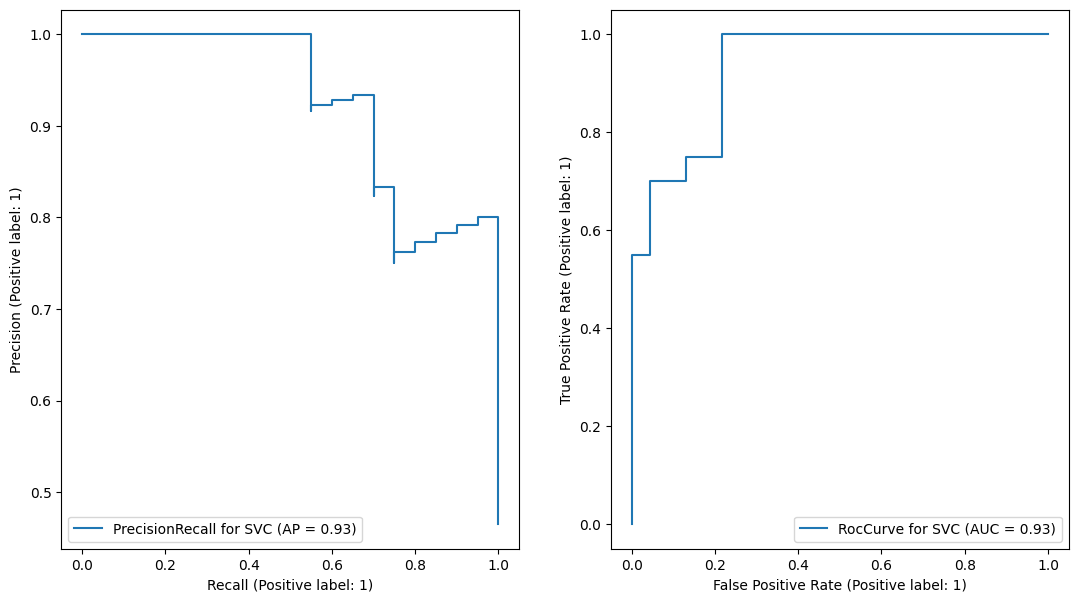

All mode:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       160
           1       0.91      0.89      0.90       137

    accuracy                           0.91       297
   macro avg       0.91      0.91      0.91       297
weighted avg       0.91      0.91      0.91       297



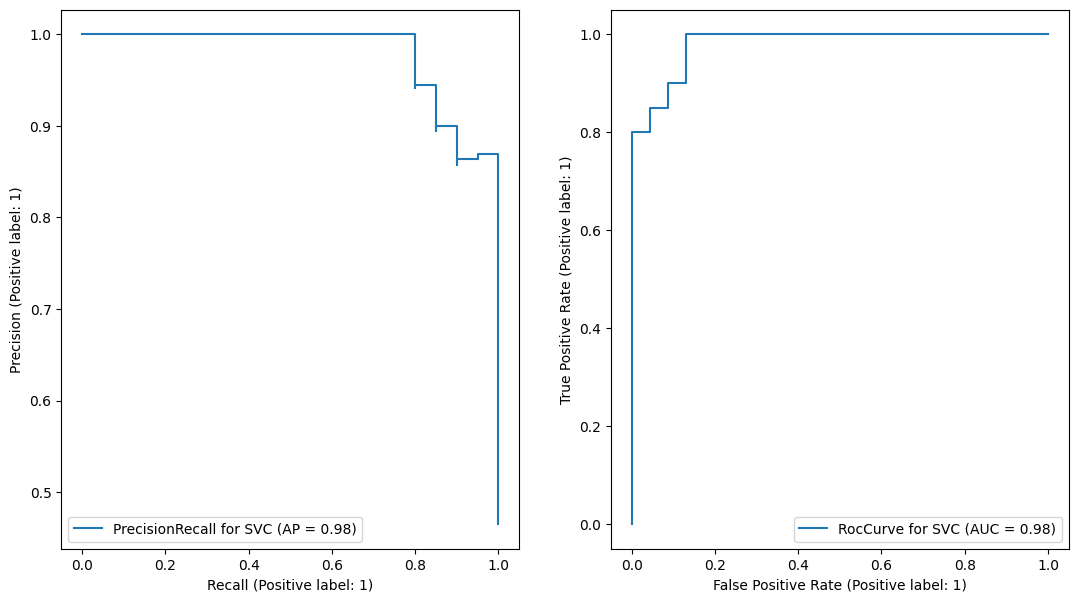

In [33]:
svc = SVC(class_weight='balanced', probability=True)
run(svc)

In [34]:
svc.predict_proba(X_norm)
svc_res = pd.DataFrame([svc.predict_proba(X_norm)[:,1], svc.predict(X_norm), y], index=['Prob','predict', 'Label']).T
svc_res[svc_res['predict'] != svc_res['Label']]

,Prob,predict,Label
10,0.514355,1.0,0.0
22,0.207928,0.0,1.0
32,0.185386,0.0,1.0
33,0.630899,1.0,0.0
44,0.083712,0.0,1.0
66,0.416775,0.0,1.0
91,0.919126,1.0,0.0
123,0.309025,0.0,1.0
129,0.646621,1.0,0.0
144,0.092138,0.0,1.0


Split mode:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.84      0.80      0.82        20

    accuracy                           0.84        43
   macro avg       0.84      0.83      0.84        43
weighted avg       0.84      0.84      0.84        43



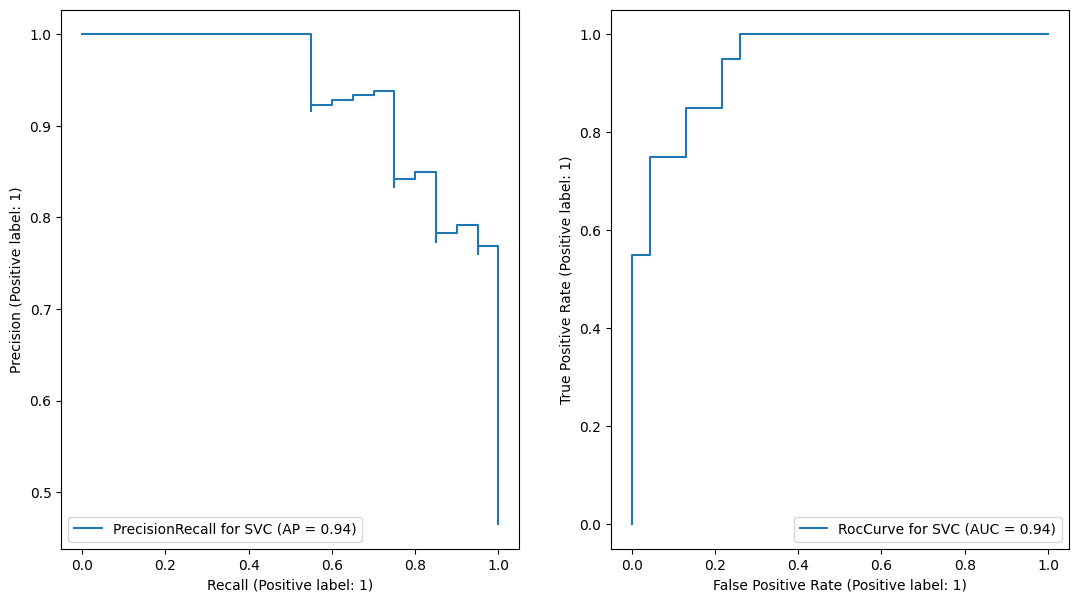

All mode:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       160
           1       0.84      0.78      0.81       137

    accuracy                           0.83       297
   macro avg       0.83      0.82      0.83       297
weighted avg       0.83      0.83      0.83       297



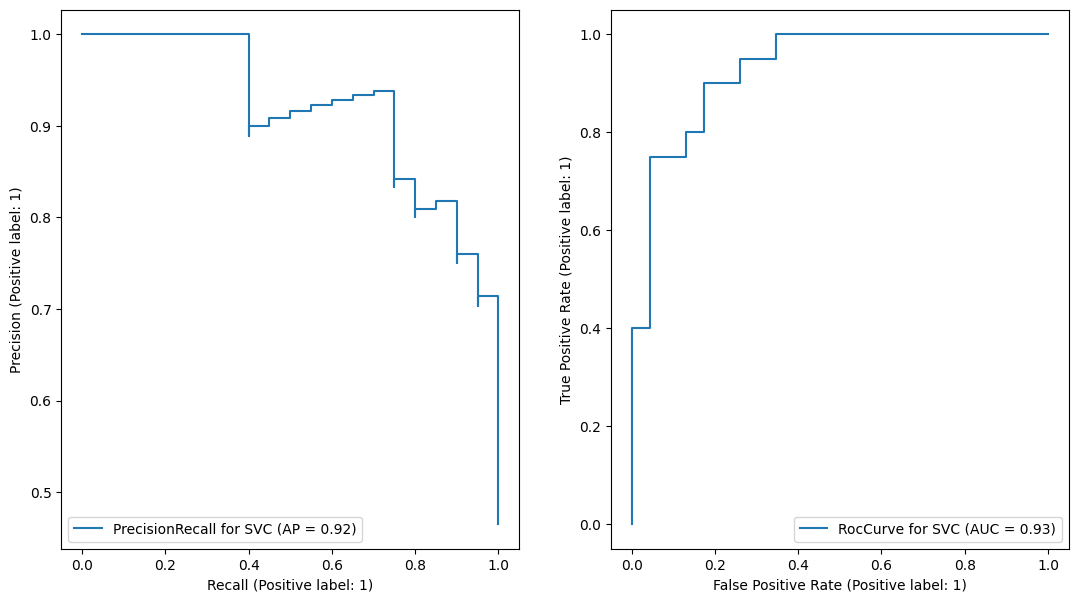

In [35]:
svc = SVC(kernel='sigmoid', class_weight='balanced', probability=True)
run(svc)

In [36]:
svc.predict_proba(X_norm)
svc_res = pd.DataFrame([svc.predict_proba(X_norm)[:,1], svc.predict(X_norm), y], index=['Prob','predict', 'Label']).T
svc_res[svc_res['predict'] != svc_res['Label']]

,Prob,predict,Label
10,0.527385,1.0,0.0
14,0.500000,1.0,0.0
16,0.177925,0.0,1.0
22,0.110716,0.0,1.0
32,0.134370,0.0,1.0
33,0.534039,1.0,0.0
44,0.147555,0.0,1.0
51,0.522853,1.0,0.0
52,0.337054,0.0,1.0
57,0.323419,0.0,1.0


Split mode:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.82      0.70      0.76        20

    accuracy                           0.79        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.79      0.79      0.79        43



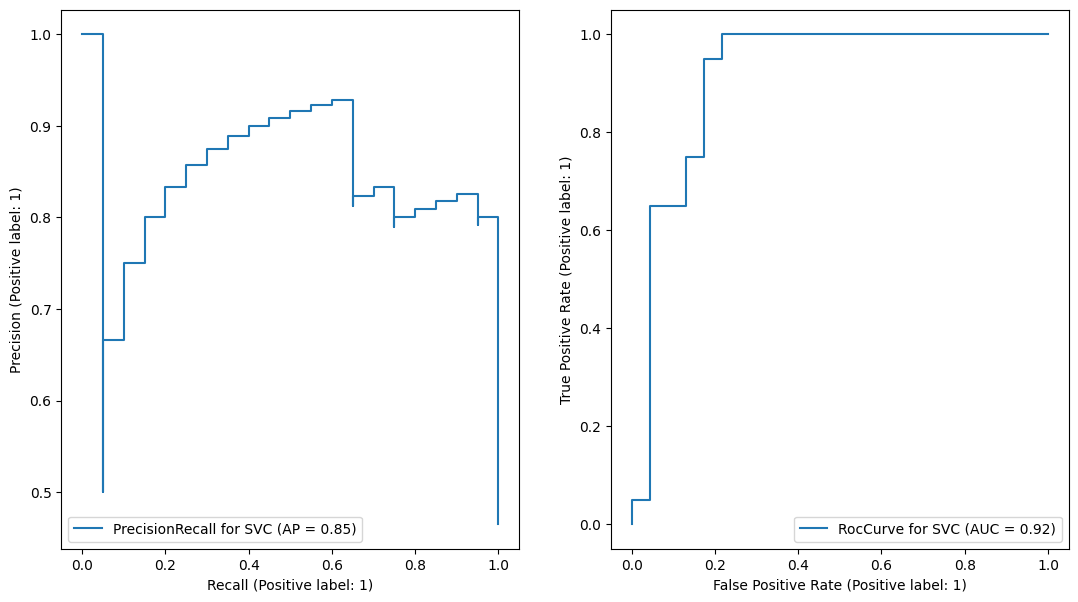

All mode:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       160
           1       0.93      0.92      0.93       137

    accuracy                           0.93       297
   macro avg       0.93      0.93      0.93       297
weighted avg       0.93      0.93      0.93       297



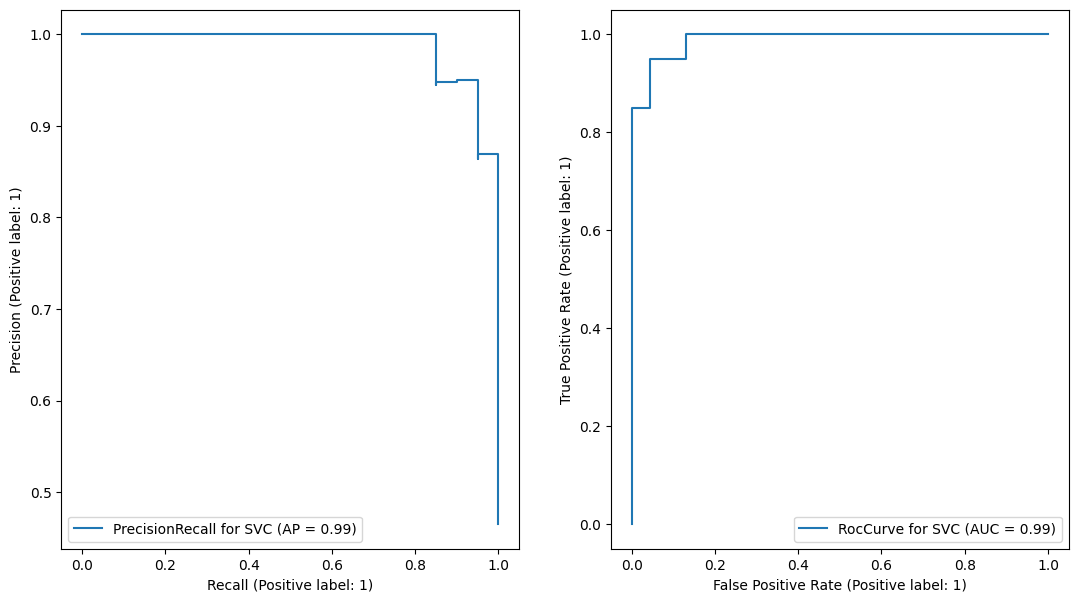

In [21]:
svc = SVC(kernel='poly', class_weight='balanced', probability=True)
run(svc)

In [37]:
svc.predict_proba(X_norm)
svc_res = pd.DataFrame([svc.predict_proba(X_norm)[:,1], svc.predict(X_norm), y], index=['Prob','predict', 'Label']).T
svc_res[svc_res['predict'] != svc_res['Label']]

,Prob,predict,Label
10,0.527385,1.0,0.0
14,0.500000,1.0,0.0
16,0.177925,0.0,1.0
22,0.110716,0.0,1.0
32,0.134370,0.0,1.0
33,0.534039,1.0,0.0
44,0.147555,0.0,1.0
51,0.522853,1.0,0.0
52,0.337054,0.0,1.0
57,0.323419,0.0,1.0


Split mode:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.80      0.60      0.69        20

    accuracy                           0.74        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.75      0.74      0.74        43



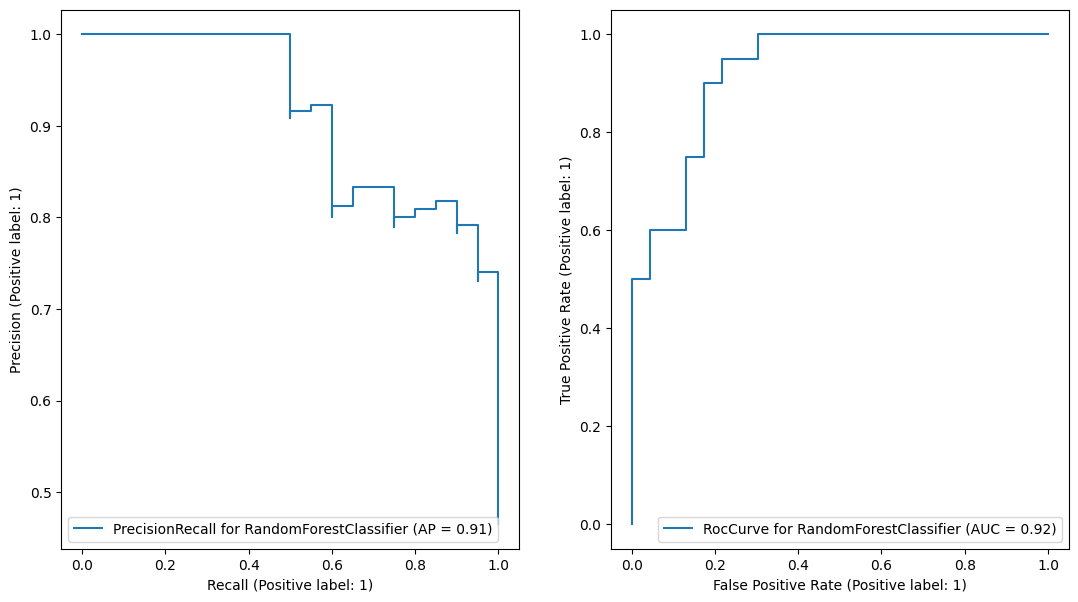

All mode:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       137

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



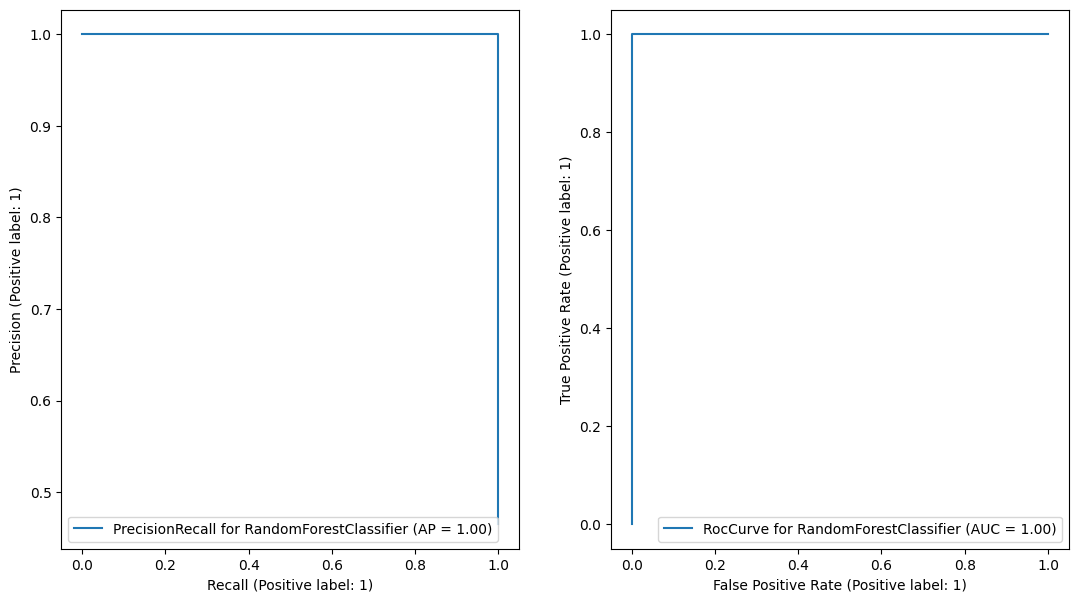

In [23]:
rf = RandomForestClassifier()
run(rf)

In [ ]:
rf.predict_proba(X_norm)

In [38]:
rf_res = pd.DataFrame([rf.predict_proba(X_norm)[:,1], rf.predict(X_norm), y], index=['Prob','predict', 'Label']).T
rf_res[rf_res['predict'] != rf_res['Label']]

,Prob,predict,Label


Split mode:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.82      0.70      0.76        20

    accuracy                           0.79        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.79      0.79      0.79        43



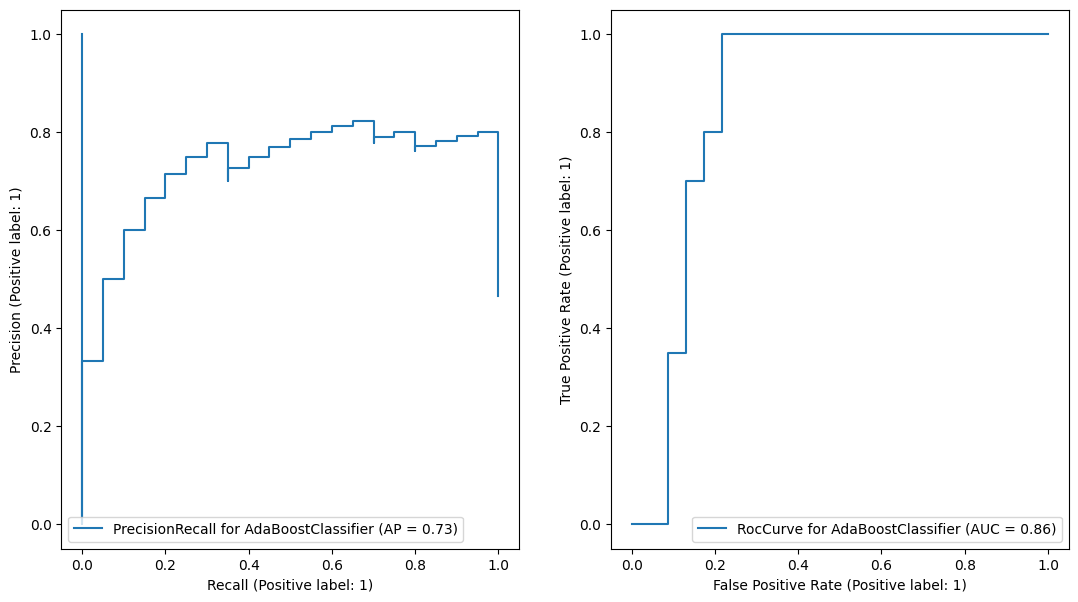

All mode:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       160
           1       0.92      0.90      0.91       137

    accuracy                           0.92       297
   macro avg       0.92      0.92      0.92       297
weighted avg       0.92      0.92      0.92       297



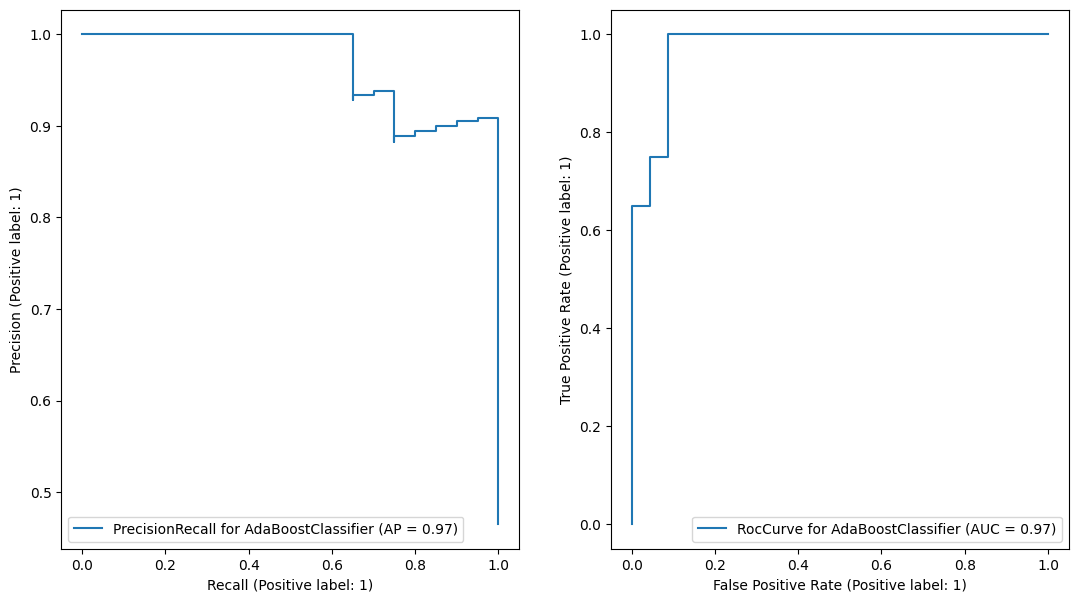

In [39]:
ada = AdaBoostClassifier()
run(ada)

In [40]:

ada_res = pd.DataFrame([ada.predict_proba(X_norm)[:,1], ada.predict(X_norm), y], index=['Prob','predict', 'Label']).T
ada_res[ada_res['predict'] != ada_res['Label']]

,Prob,predict,Label
22,0.498091,0.0,1.0
33,0.502486,1.0,0.0
57,0.499844,0.0,1.0
69,0.497987,0.0,1.0
83,0.496413,0.0,1.0
91,0.510958,1.0,0.0
123,0.498252,0.0,1.0
144,0.486542,0.0,1.0
158,0.502451,1.0,0.0
169,0.503151,1.0,0.0


Split mode:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.83      0.75      0.79        20

    accuracy                           0.81        43
   macro avg       0.82      0.81      0.81        43
weighted avg       0.82      0.81      0.81        43



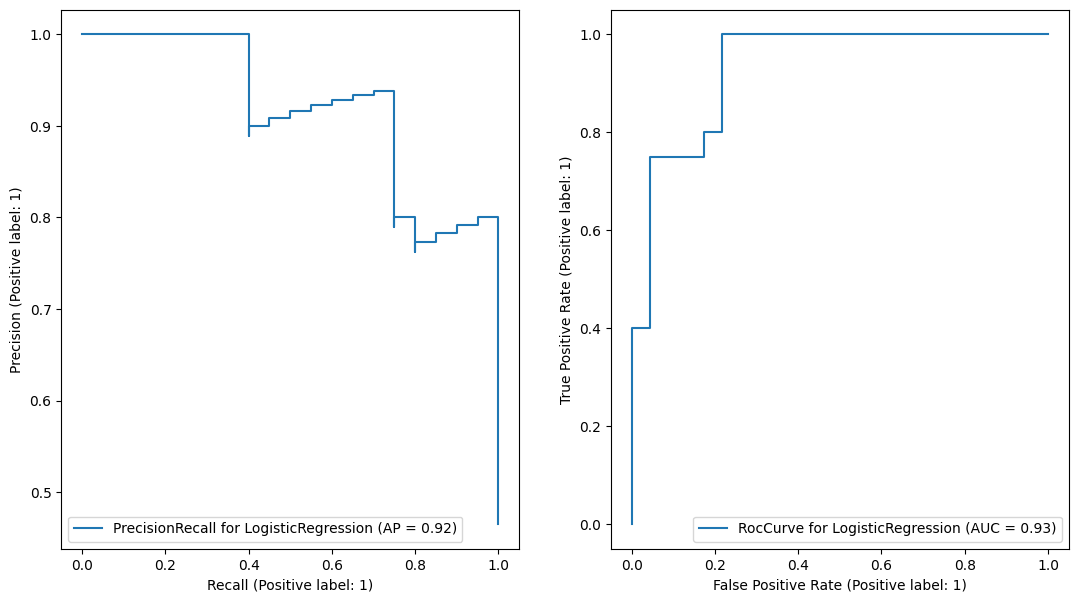

All mode:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       160
           1       0.86      0.81      0.83       137

    accuracy                           0.85       297
   macro avg       0.85      0.85      0.85       297
weighted avg       0.85      0.85      0.85       297



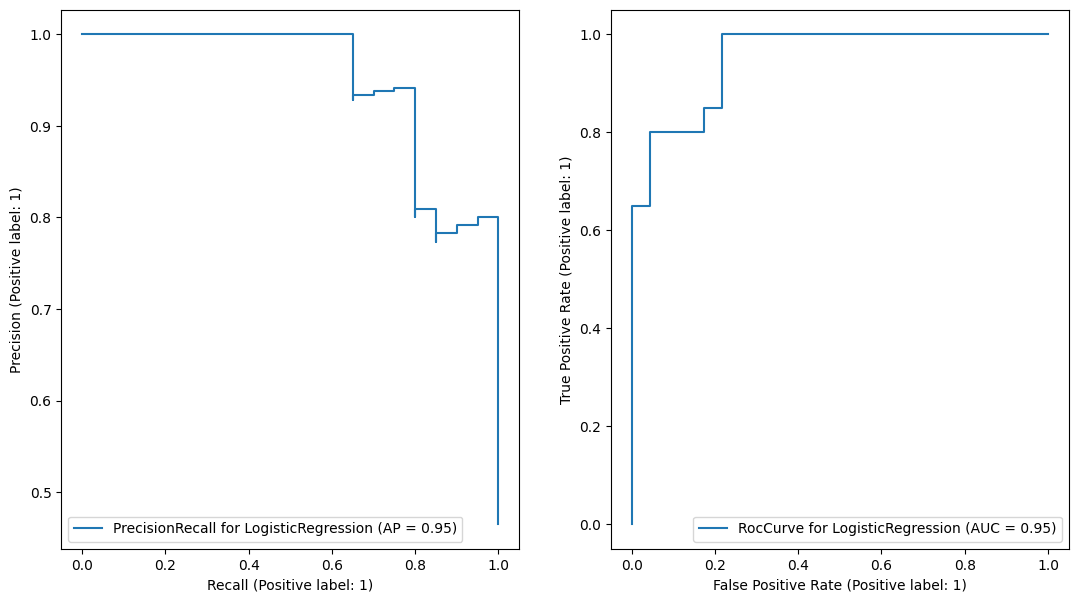

In [41]:
lg = LogisticRegression(solver='saga', penalty='elasticnet', C=0.3, l1_ratio=0.8, max_iter=1000)
run(lg)

In [42]:

lg_res = pd.DataFrame([lg.predict_proba(X_norm)[:,1], lg.predict(X_norm), y], index=['Prob','predict', 'Label']).T
lg_res[lg_res['predict'] != lg_res['Label']]

,Prob,predict,Label
16,0.315089,0.0,1.0
22,0.182326,0.0,1.0
32,0.142831,0.0,1.0
33,0.540276,1.0,0.0
44,0.102266,0.0,1.0
52,0.405036,0.0,1.0
57,0.395937,0.0,1.0
58,0.543493,1.0,0.0
66,0.361126,0.0,1.0
67,0.523176,1.0,0.0
